# DATA EXPLORATION

analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

Before beginning your analysis, it's important that to familiarize with the dataset. 
We will read the dataset into pandas, examine the first few rows, and then count the number of missing values.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
# Read 'police.csv' into a DataFrame named ri and set index with date and time combile column 'date' and 'stop_time'
ri = pd.read_csv('PoliceRI2020.csv', parse_dates= [['date', 'stop_time']], index_col='date_stop_time')

# Examine the head of the DataFrame
ri.head()

,Unnamed: 0,raw_row_number,district,subject_race,subject_sex,arrest_made,citation_issued,warning_issued,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,search_conducted,reason_for_stop
date_stop_time,,,,,,,,,,,,,,,
2005-11-22 11:15:00,0,1,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
2005-10-01 12:20:00,1,2,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
2005-10-01 12:30:00,2,3,X3,white,female,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
2005-10-01 12:50:00,3,4,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
2005-10-01 13:10:00,4,5,X3,white,female,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding


In [ ]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['raw_row_number', 'Unnamed: 0', 'contraband_found'], axis='columns', inplace=True)

# rename to meaningful name for driver detail
ri.rename(columns={'subject_race': 'driver_race', 'subject_sex':'driver_gender'}, inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(509681, 15)
(509681, 12)


In [ ]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509681 entries, 2005-11-22 11:15:00 to nan nan
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   district            509671 non-null  object 
 1   driver_race         480608 non-null  object 
 2   driver_gender       480584 non-null  object 
 3   arrest_made         480608 non-null  object 
 4   citation_issued     480608 non-null  object 
 5   warning_issued      480608 non-null  object 
 6   contraband_drugs    15988 non-null   object 
 7   contraband_weapons  11795 non-null   object 
 8   contraband_alcohol  1217 non-null    object 
 9   frisk_performed     509681 non-null  float64
 10  search_conducted    509681 non-null  bool   
 11  reason_for_stop     480608 non-null  object 
dtypes: bool(1), float64(1), object(10)
memory usage: 47.1+ MB


# Cleaning and manipulation data

manage the missing value and catergorize to the proper type  
change nan values in contraband columns to True and False

In [ ]:
# Count the number of missing values in each column
ri.isnull().sum()

district                  10
driver_race            29073
driver_gender          29097
arrest_made            29073
citation_issued        29073
warning_issued         29073
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
frisk_performed            0
search_conducted           0
reason_for_stop        29073
dtype: int64

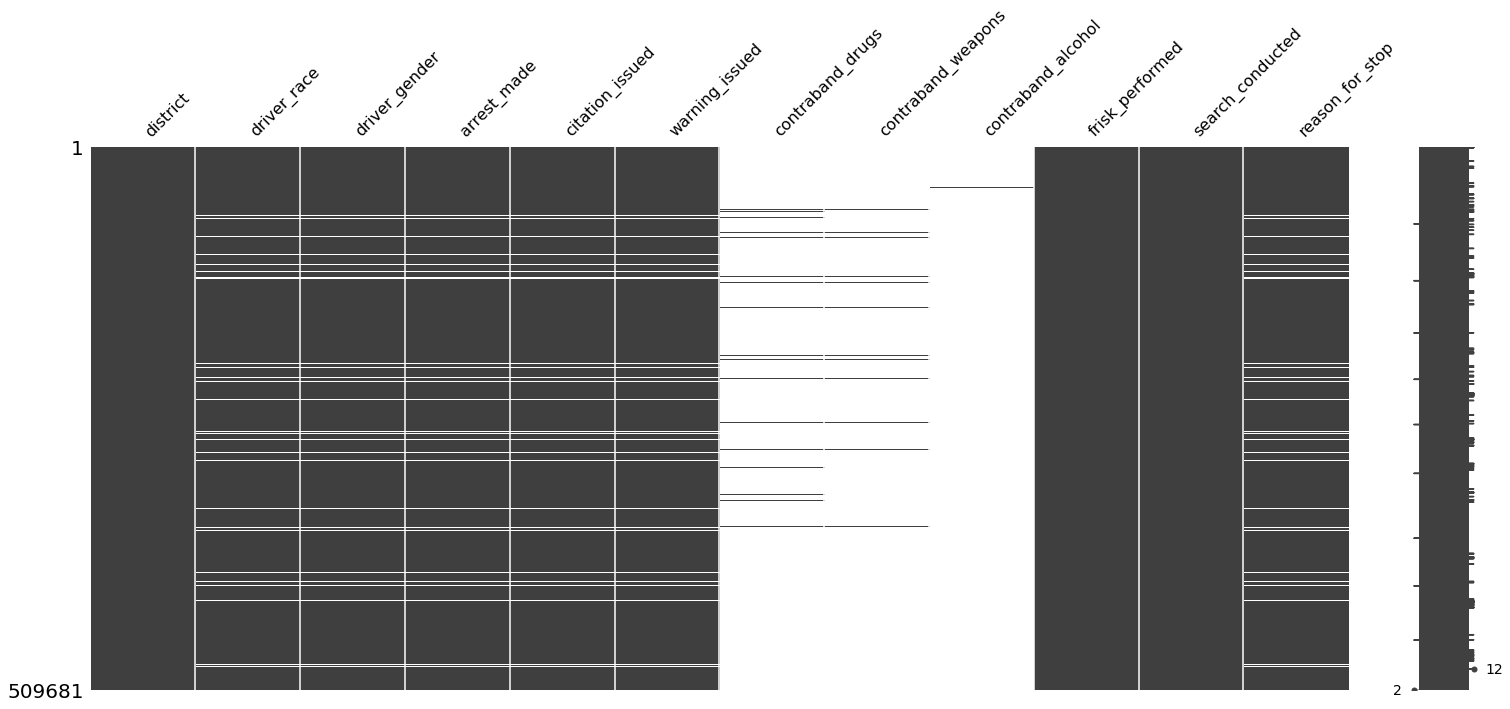

In [ ]:
msno.matrix(ri)

In [ ]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)
print('\n')
# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)



district                   0
driver_race                0
driver_gender              0
arrest_made                0
citation_issued            0
warning_issued             0
contraband_drugs      464596
contraband_weapons    468789
contraband_alcohol    479367
frisk_performed            0
search_conducted           0
reason_for_stop            0
dtype: int64
(480584, 12)


In [ ]:
# check unique value in contraband_ column
ri.contraband_drugs.replace(np.nan, False, inplace= True)
ri.contraband_weapons.replace(np.nan, False, inplace= True)
ri.contraband_alcohol.replace(np.nan, False, inplace= True)

In [ ]:
ri.isnull().sum()

district              0
driver_race           0
driver_gender         0
arrest_made           0
citation_issued       0
warning_issued        0
contraband_drugs      0
contraband_weapons    0
contraband_alcohol    0
frisk_performed       0
search_conducted      0
reason_for_stop       0
dtype: int64

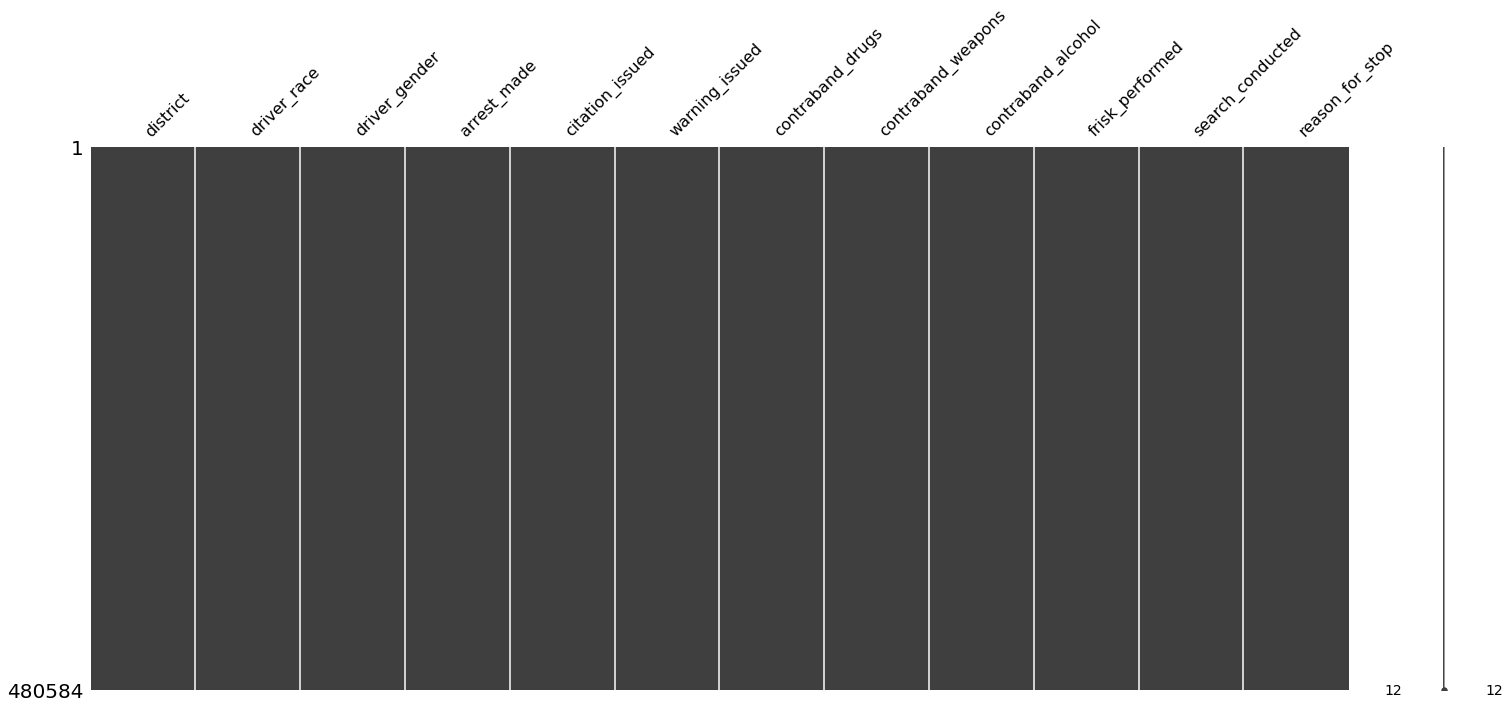

In [ ]:
msno.matrix(ri)

## check posible value type and how many value in each column

In [ ]:
for i in ri.columns:
#     if i != 'raw_row_number' and i != 'date' and i != 'time' and i != 'department_id' and i != 'vehicle_make' and i != 'vehicle_model' and i != 'raw_BasisForStop'and i != 'raw_SearchResultOne' and i != 'raw_SearchResultTwo' and i != 'raw_SearchResultThree':
        print(ri[i].value_counts())

X4    125670
K3    108868
K2     97281
X3     89431
K1     46110
X1     13224
Name: district, dtype: int64
white                     344716
black                      68577
hispanic                   53123
asian/pacific islander     12824
other                       1344
Name: driver_race, dtype: int64
male      349446
female    131138
Name: driver_gender, dtype: int64
False    463981
True      16603
Name: arrest_made, dtype: int64
True     428378
False     52206
Name: citation_issued, dtype: int64
False    451744
True      28840
Name: warning_issued, dtype: int64
False    475819
True       4765
Name: contraband_drugs, dtype: int64
False    480085
True        499
Name: contraband_weapons, dtype: int64
False    479464
True       1120
Name: contraband_alcohol, dtype: int64
0.0    471262
1.0      9322
Name: frisk_performed, dtype: int64
False    462822
True      17762
Name: search_conducted, dtype: int64
Speeding                            268736
Other Traffic Violation              90228

## Using proper dtype

In [ ]:
#arrest_made is object then should be change to 'bool'

ri['district'] = ri.district.astype('category')
ri['driver_race'] = ri.driver_race.astype('category')
ri['driver_gender'] = ri.driver_gender.astype('category')
ri['arrest_made'] = ri.arrest_made.astype('bool')
ri['citation_issued'] = ri.citation_issued.astype('bool')
ri['warning_issued'] = ri.warning_issued.astype('bool')
ri['frisk_performed'] = ri.frisk_performed.astype('bool')

ri['reason_for_stop'] = ri.reason_for_stop.astype('category')

print(ri.dtypes)
print('\n')

district              category
driver_race           category
driver_gender         category
arrest_made               bool
citation_issued           bool
warning_issued            bool
contraband_drugs          bool
contraband_weapons        bool
contraband_alcohol        bool
frisk_performed           bool
search_conducted          bool
reason_for_stop       category
dtype: object




In [ ]:
# change index to timestamp format
ri.index = pd.to_datetime(ri.index)

In [ ]:
#check info() for memory usage reduce when group into proper dtype.
print('previously memory usage: 40+ ish MB', '\n')
ri.info()

previously memory usage: 40+ ish MB 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480584 entries, 2005-11-22 11:15:00 to 2015-10-30 11:09:00
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   district            480584 non-null  category
 1   driver_race         480584 non-null  category
 2   driver_gender       480584 non-null  category
 3   arrest_made         480584 non-null  bool    
 4   citation_issued     480584 non-null  bool    
 5   warning_issued      480584 non-null  bool    
 6   contraband_drugs    480584 non-null  bool    
 7   contraband_weapons  480584 non-null  bool    
 8   contraband_alcohol  480584 non-null  bool    
 9   frisk_performed     480584 non-null  bool    
 10  search_conducted    480584 non-null  bool    
 11  reason_for_stop     480584 non-null  category
dtypes: bool(8), category(4)
memory usage: 9.2 MB


In [ ]:
ri.head()

,district,driver_race,driver_gender,arrest_made,citation_issued,warning_issued,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,search_conducted,reason_for_stop
date_stop_time,,,,,,,,,,,,
2005-11-22 11:15:00,X3,white,male,False,True,False,False,False,False,False,False,Speeding
2005-10-01 12:20:00,X3,white,male,False,True,False,False,False,False,False,False,Speeding
2005-10-01 12:30:00,X3,white,female,False,True,False,False,False,False,False,False,Speeding
2005-10-01 12:50:00,X3,white,male,False,True,False,False,False,False,False,False,Speeding
2005-10-01 13:10:00,X3,white,female,False,True,False,False,False,False,False,False,Speeding


In [ ]:
# check type of index and columns
print(ri.index)
print(ri.columns)

DatetimeIndex(['2005-11-22 11:15:00', '2005-10-01 12:20:00',
               '2005-10-01 12:30:00', '2005-10-01 12:50:00',
               '2005-10-01 13:10:00', '2005-10-01 15:50:00',
               '2005-09-11 11:45:00', '2005-09-11 11:45:00',
               '2005-10-04 11:55:00', '2005-10-04 11:55:00',
               ...
               '2015-12-29 13:28:00', '2015-12-27 12:45:00',
               '2015-12-27 13:43:00', '2015-12-28 02:29:00',
               '2015-12-30 11:42:00', '2015-08-16 13:37:00',
               '2015-08-04 10:40:00', '2015-12-20 11:17:00',
               '2015-11-09 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='date_stop_time', length=480584, freq=None)
Index(['district', 'driver_race', 'driver_gender', 'arrest_made',
       'citation_issued', 'warning_issued', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'frisk_performed',
       'search_conducted', 'reason_for_stop'],
      dtype='object')


In [ ]:
# check for general statistics
ri.describe()

,district,driver_race,driver_gender,arrest_made,citation_issued,warning_issued,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,search_conducted,reason_for_stop
count,480584,480584,480584,480584,480584,480584,480584,480584,480584,480584,480584,480584
unique,6,5,2,2,2,2,2,2,2,2,2,12
top,X4,white,male,False,True,False,False,False,False,False,False,Speeding
freq,125670,344716,349446,463981,428378,451744,475819,480085,479464,471262,462822,268736


## Exploring the relationship between driver gender and policing

In [ ]:
# Count the unique values in 'violation'
print(ri.reason_for_stop.value_counts())
print('\n')

# Express the counts as proportions
print(ri.reason_for_stop.value_counts(normalize= True))

Speeding                            268736
Other Traffic Violation              90228
Equipment/Inspection Violation       61250
Registration Violation               19830
Seatbelt Violation                   16324
Special Detail/Directed Patrol       13642
Call for Service                      7605
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               989
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64


Speeding                            0.559186
Other Traffic Violation             0.187747
Equipment/Inspection Violation      0.127449
Registration Violation              0.041262
Seatbelt Violation                  0.033967
Special Detail/Directed Patrol      0.028386
Call for Service                    0.015824
Violation of City/Town Ordinance    0.002156
Motorist Assist/Courtesy            0.002058
APB                                 0.001

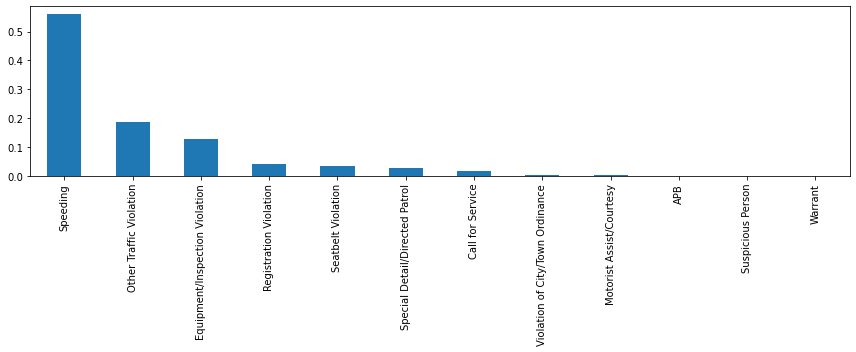

In [ ]:
ri.reason_for_stop.value_counts(normalize= True).plot(kind='bar', figsize=(12,5))
plt.tight_layout()
plt.show()

## separate by driver_gender

In [ ]:
# slice to new df as only female and male DataFrame
female = ri[ri.driver_gender == 'female']
male = ri[ri.driver_gender == 'male']

# value_counts(normalize= True) on reason_for_stop
print('female reason_for_stop counts \n', female.reason_for_stop.value_counts(normalize= True))
print('\n')
print('male reason_for_stop counts \n', male.reason_for_stop.value_counts(normalize=True))


female reason_for_stop counts 
 Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB                                 0.000831
Suspicious Person                   0.000564
Warrant                             0.000206
Name: reason_for_stop, dtype: float64


male reason_for_stop counts 
 Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.00234

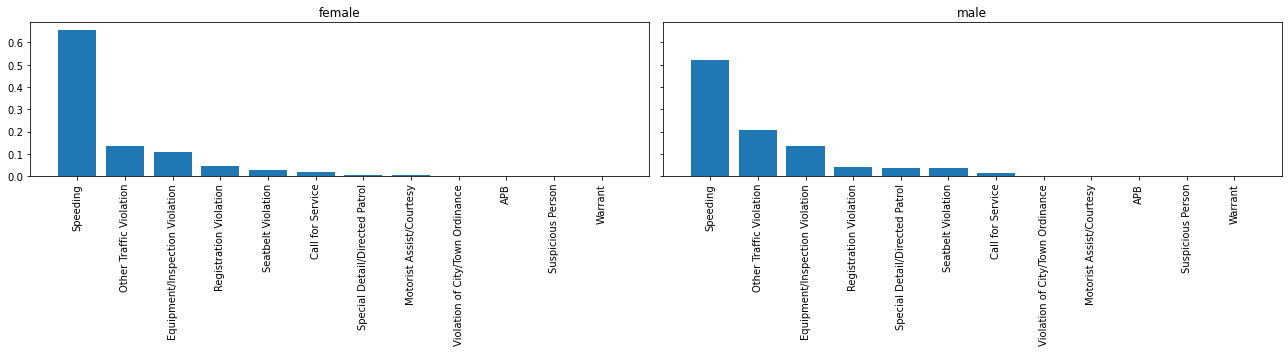

In [ ]:
# Create 2 subplot to compare female and male case for reasone to stop
fig, ax = plt.subplots(1,2, figsize=(18,5), sharey= True)
ax[0].bar(female.reason_for_stop.value_counts(normalize= True).index, female.reason_for_stop.value_counts(normalize= True))
ax[1].bar(male.reason_for_stop.value_counts(normalize= True).index, male.reason_for_stop.value_counts(normalize= True))
ax[0].set_title('female')
ax[1].set_title('male')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()

plt.show()

<b><i> the female speeding case is more than male?</i></b>

from 'bar chart show the speeding violate by female more than 65 percent.

In [ ]:
# find out how many male and femele for further investigation
print('male on record {} males'.format(male.shape[0]))
print('female on record :',female.shape[0], '\n')
print('=> male and female proportion is different.')

male on record 349446 males
female on record : 131138 

=> male and female proportion is different.


In [ ]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'female') & (ri.reason_for_stop == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'male') & (ri.reason_for_stop == 'Speeding')]

In [ ]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.citation_issued.value_counts(normalize= True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.citation_issued.value_counts(normalize= True))

True     0.953247
False    0.046753
Name: citation_issued, dtype: float64
True     0.944636
False    0.055364
Name: citation_issued, dtype: float64


### <i>the data fails to show that gender has an impact on who gets a ticket for speeding.</i>
<i><b>The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, </i></b>  
<i>So, be careful on assume the comparison on different sample size.

## Does gender affect whose vehicle is searched?

.value_counts() will separate the count for each in pd.series , count() is count every datapoint

In [ ]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtypes)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64
0.036959199640437465


 the search rate is about 3.8%.

## Is the search rate varies by driver gender.

In [ ]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())
print('\n')

# calculate by mean with out groupby() วิธีที่สองได้ผมเหมือนกัน
# print(ri[ri.driver_gender=='female'].search_conducted.mean())
# print(ri[ri.driver_gender=='male'].search_conducted.mean())
print('search was conducted in male 4.4 percent and in female 1.9 percent')

driver_gender
female    0.018751
male      0.043792
Name: search_conducted, dtype: float64


search was conducted in male 4.4 percent and in female 1.9 percent


## compare Search_conduct rate that consequence from reason_for_stop and driver_gender

<b>An all-points bulletin (APB)</b> is a broadcast issued from any American or Canadian law enforcement agency to its personnel, or to other law enforcement agencies. It typically contains information about a wanted suspect who is to be arrested or a person of interest, for whom law enforcement officers are to look. They are usually dangerous or missing persons. As used by American police  

An all-points bulletin can also be known as a BOLO or BOL, which stands for "be on (the) look-out". Such an alert may also be called a lookout or ATL ("attempt to locate").

In [ ]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'reason_for_stop']).search_conducted.mean())

driver_gender  reason_for_stop                 
female         APB                                 0.165138
               Call for Service                    0.042230
               Equipment/Inspection Violation      0.040245
               Motorist Assist/Courtesy            0.033133
               Other Traffic Violation             0.038021
               Registration Violation              0.054700
               Seatbelt Violation                  0.017746
               Special Detail/Directed Patrol      0.018045
               Speeding                            0.007738
               Suspicious Person                   0.216216
               Violation of City/Town Ordinance    0.060185
               Warrant                             0.148148
male           APB                                 0.255319
               Call for Service                    0.092419
               Equipment/Inspection Violation      0.070916
               Motorist Assist/Courtesy            0

it hard to compare between gender , re order of groupby

In [ ]:
ri.groupby(['reason_for_stop', 'driver_gender']).search_conducted.mean().head(30)

reason_for_stop                   driver_gender
APB                               female           0.165138
                                  male             0.255319
Call for Service                  female           0.042230
                                  male             0.092419
Equipment/Inspection Violation    female           0.040245
                                  male             0.070916
Motorist Assist/Courtesy          female           0.033133
                                  male             0.089802
Other Traffic Violation           female           0.038021
                                  male             0.059156
Registration Violation            female           0.054700
                                  male             0.103589
Seatbelt Violation                female           0.017746
                                  male             0.031705
Special Detail/Directed Patrol    female           0.018045
                                  male             0

For all types of violations, the search rate in males is higher than females  

that from above the max search rate in female is about 3.8%.
that indicated gender does affect on search rate

In [ ]:
ri.groupby(['reason_for_stop', 'driver_gender']).search_conducted.mean().unstack(level=-1)

driver_gender,female,male
reason_for_stop,,
APB,0.165138,0.255319
Call for Service,0.042230,0.092419
Equipment/Inspection Violation,0.040245,0.070916
Motorist Assist/Courtesy,0.033133,0.089802
Other Traffic Violation,0.038021,0.059156
Registration Violation,0.054700,0.103589
Seatbelt Violation,0.017746,0.031705
Special Detail/Directed Patrol,0.018045,0.010249
Speeding,0.007738,0.026630


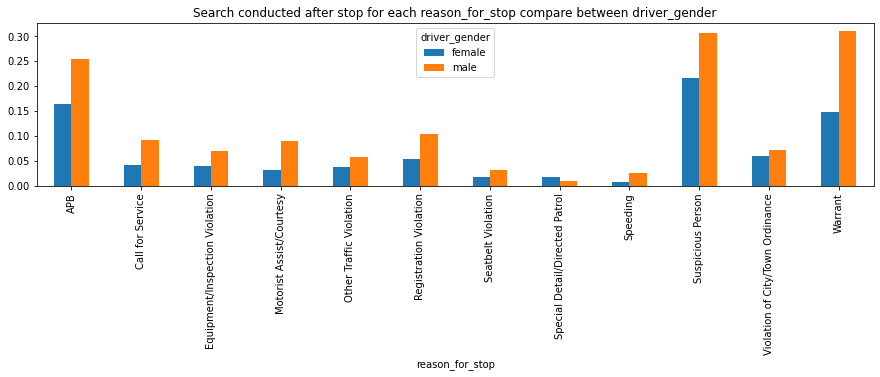

In [ ]:
ri.groupby(['reason_for_stop', 'driver_gender']).search_conducted.mean().unstack(level=-1).plot(kind= 'bar', figsize=(15,3))
# plt.tight_layout()
plt.title('Search conducted after stop for each reason_for_stop compare between driver_gender')
plt.show()

## Does gender affect who is frisked during a search?


In [ ]:
# Take the sum of 'frisk'
print(ri.frisk_performed.sum())

9322


## compare frisk by gender

In [ ]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk_performed.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk_performed.mean())

0.5248282851030289
driver_gender
female    0.437983
male      0.538783
Name: frisk_performed, dtype: float64


<i>The frisk rate is higher for males than for females around 10 percent, <br>   though we can't conclude that this difference is caused by the driver's gender.

## Chance of drugs founded with search was conducted

In [ ]:
ri.groupby('search_conducted').mean() #.contraband_drugs.mean()

,arrest_made,citation_issued,warning_issued,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed
search_conducted,,,,,,,
False,0.022505,0.902863,0.060950,0.000000,0.000000,0.000000,0.000000
True,0.348328,0.591882,0.035525,0.268269,0.028094,0.063056,0.524828


<i><b> each searh has change that relate with drug 26.8 percent. 
   

## Chance of illegal contraband founded with search was conducted separated by driver race

In [ ]:
ri.loc[ri['search_conducted']== True].groupby('driver_race').mean()[['contraband_weapons','contraband_alcohol', 'contraband_drugs']] 

,contraband_weapons,contraband_alcohol,contraband_drugs
driver_race,,,
asian/pacific islander,0.017857,0.060714,0.207143
black,0.033411,0.048260,0.269838
hispanic,0.017247,0.048605,0.236751
other,0.000000,0.000000,0.066667
white,0.029595,0.074238,0.279695


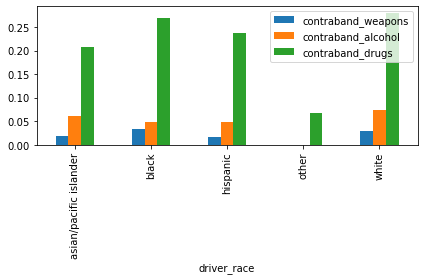

In [ ]:
ri.loc[ri['search_conducted']== True].groupby('driver_race').mean()[['contraband_weapons','contraband_alcohol', 'contraband_drugs']].plot.bar()
plt.tight_layout()
plt.show()

<i><b>from the chart above show no significant connection for specific driver_race to the contraband illegal subject.

## What violations are caught in each district?

pd.crosstab(df.column1,df.column2) # df.column is pd.series
.loc[]

In [ ]:
# group the table and see frequency in all districts and violations
all_area = pd.crosstab(ri['district'], ri['reason_for_stop'])
all_area.head(10)

reason_for_stop,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
district,,,,,,,,,,,,
K1,32,281,3786,78,7127,628,1,1009,33067,72,21,8
K2,101,1036,11285,118,16440,4056,2897,3539,57500,59,237,13
K3,144,1227,12959,258,16218,3871,3660,2011,68234,68,194,24
X1,6,198,1725,33,3711,192,451,503,6393,5,6,1
X3,64,1328,11520,323,17178,3532,4445,1996,48687,41,282,35
X4,138,3535,19975,179,29554,7551,4870,4584,54855,97,296,36


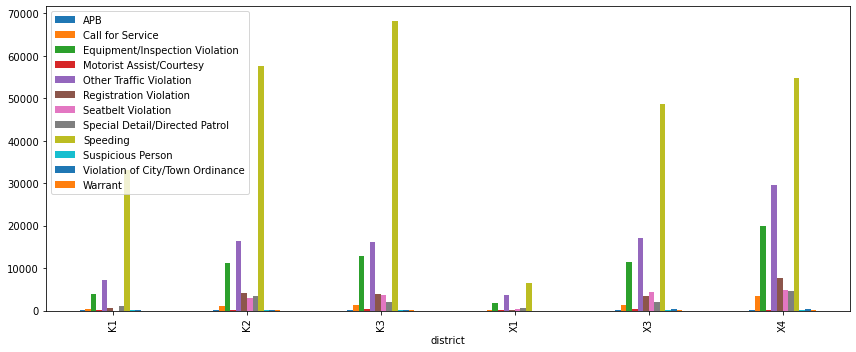

In [ ]:
all_area.plot(kind='bar', figsize= (12,5))
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

<i>each district must have a different population size of people but we saw the most stop is "Speeding".

In [ ]:
# all_area_nrm = (all_area-all_area.min())/(all_area.max()-all_area.min()) == need?
# all_area_stded = (all_area-all_area.mean())/all_area.std() == not reasonable to use Standardization 

# How Driver Race influence police activity?

In [ ]:
# show each race count
ri.loc[ri.index.year == 2015].driver_race.value_counts()

white                     28676
hispanic                   7926
black                      7411
asian/pacific islander     1134
other                        52
Name: driver_race, dtype: int64

In [ ]:
# find the stop count for each race in year 2015
race_stop = pd.DataFrame(ri.loc[ri.index.year == 2015].driver_race.value_counts())
race_stop

,driver_race
white,28676
hispanic,7926
black,7411
asian/pacific islander,1134
other,52


In [ ]:
Ri_pop = pd.read_csv('dataset/RIpopulation.csv')
Ri_pop

,date,black,hispanic,other,white,asian/pacific islander
0,2011,62682,127816,66414,863294,31935
1,2012,64711,131316,64291,859686,32213
2,2013,66569,135317,64602,855594,32767
3,2014,66827,139832,61994,856605,33530
4,2015,68243,143788,61085,854859,34586
5,2016,68886,148375,61218,854026,35173
6,2017,68346,153910,59967,854801,36315
7,2018,69254,158858,58136,854502,36526


In [ ]:
# proper change the colomn name and adjust table
Ri_pop2015 = pd.DataFrame(Ri_pop.loc[Ri_pop['date'] ==2015])
Ri_pop2015.drop(columns=['date'], inplace= True)
Ri_pop2015 = Ri_pop2015.transpose()
Ri_pop2015.rename(columns={4: "pop2015"},inplace=True)

In [ ]:
Ri_pop2015

,pop2015
black,68243
hispanic,143788
other,61085
white,854859
asian/pacific islander,34586


## Find out the stop rate on each race

by merging 2 tables and add stop_rate column 

In [ ]:
race_stop2015 = race_stop.merge(Ri_pop2015, left_on=race_stop.index, right_on=Ri_pop2015.index)
race_stop2015.rename(columns={'key_0': "race", 'driver_race':'stop_number', 'pop2015':'num_people'},inplace=True)
race_stop2015['stop_rate'] = race_stop2015['stop_number'] / race_stop2015['num_people']

In [ ]:
race_stop2015

,race,stop_number,num_people,stop_rate
0,white,28676,854859,0.033545
1,hispanic,7926,143788,0.055123
2,black,7411,68243,0.108597
3,asian/pacific islander,1134,34586,0.032788
4,other,52,61085,0.000851


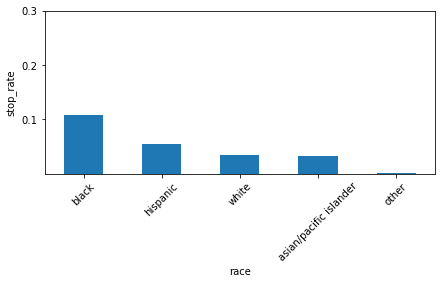

In [ ]:
race_stop2015.set_index('race').stop_rate.sort_values(ascending= False).plot(kind= 'bar', figsize= (7,3))
plt.xticks(rotation=45)
plt.yticks([0.1,0.2,0.3])
plt.ylabel('stop_rate')
# plt.gca().axes.get_xaxis().set_visible(False) use to hide xtick and x-axis

plt.show()

<b><i> In Rhod Island stop rate for black people is higher than the rest race base on population proportion.
Black drivers are stopped at a rate 3.2 times higher than white drivers. Hispanic drivers are stopped at a rate 1.6 times higher than white drivers.

## Search rates and frisk rate by each race

In [ ]:
# fns2015 = ri.loc[ri.index.year == 2015].groupby('driver_race').mean()[['frisk_performed','search_conducted']]
fns2015 = ri.groupby('driver_race').mean()[['frisk_performed','search_conducted']]
fns2015

,frisk_performed,search_conducted
driver_race,,
asian/pacific islander,0.010449,0.021834
black,0.033641,0.062849
hispanic,0.029592,0.060030
other,0.005208,0.011161
white,0.015381,0.028917


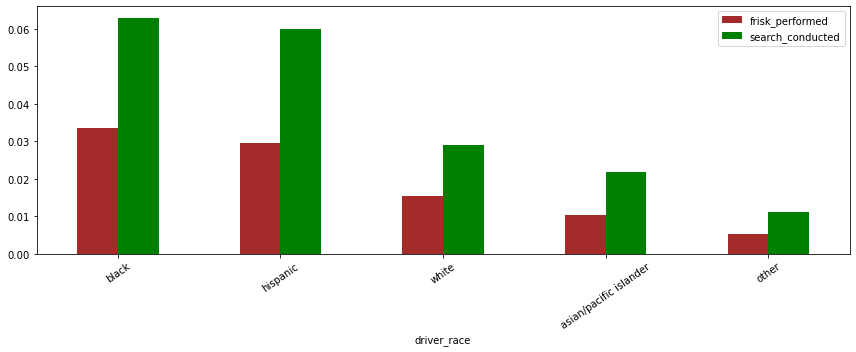

In [ ]:
fns2015.sort_values(by='frisk_performed', ascending=False).plot.bar(color=['brown', 'green'], figsize= (12,5))
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

In [ ]:
# compare value how many fold base on white race 
fns2015.loc['white']['frisk_performed']
fns2015.loc['white']['search_conducted']
fns2015_twhite = fns2015.copy()
fns2015_twhite['div_by_whith_frisk'] = fns2015_twhite.frisk_performed / (fns2015.loc['white']['frisk_performed'])
fns2015_twhite['div_by_whith_sch'] = fns2015_twhite.frisk_performed / (fns2015.loc['white']['search_conducted'])
fns2015_twhite

,frisk_performed,search_conducted,div_by_whith_frisk,div_by_whith_sch
driver_race,,,,
asian/pacific islander,0.010449,0.021834,0.679365,0.361356
black,0.033641,0.062849,2.187212,1.163382
hispanic,0.029592,0.060030,1.923941,1.023348
other,0.005208,0.011161,0.338626,0.180116
white,0.015381,0.028917,1.000000,0.531902


Here we see that among drivers who were stopped, <i><b>black drivers were searched at a rate 2.19</i></b> times higher than white drivers, and <i><b>Hispanic drivers were searched at a rate 1.92</i></b> times higher than white drivers. <i><b>Black drivers were frisked at a rate 1.16</i></b> times higher than white drivers were, and <i><b>Hispanic drivers were frisked at a rate 1.02</i></b> times higher than white drivers were.

In [ ]:
print("Here we see that among drivers who were stopped, black drivers were searched at a rate {:.2f} times higher than white drivers, and Hispanic drivers were searched at a rate {:.2f} times higher than white drivers. Black drivers were frisked at a rate {:.2f} times higher than white drivers were, and Hispanic drivers were frisked at a rate {:.2f} times higher than white drivers were".format(fns2015_twhite.loc['black']['div_by_whith_frisk'], fns2015_twhite.loc['hispanic']['div_by_whith_frisk'], fns2015_twhite.loc['black']['div_by_whith_sch'], fns2015_twhite.loc['hispanic']['div_by_whith_sch']))

Here we see that among drivers who were stopped, black drivers were searched at a rate 2.19 times higher than white drivers, and Hispanic drivers were searched at a rate 1.92 times higher than white drivers. Black drivers were frisked at a rate 1.16 times higher than white drivers were, and Hispanic drivers were frisked at a rate 1.02 times higher than white drivers were
